In [19]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline

# Objectif du notebook

Ce notebook permet de créer les différents fichiers pour les différentes variables à prédire suivant plusieurs période.

Ces fichier sont sauvegardés dans le répertoire ./dataset/.

La période minimum de 3 heures correspond à la période minimale du jeu de données exogène pour la météo.

La période de 1 mois généralise trop les données et ne permet pas d'avoir une représentation réaliste d'une balance négative.

Les bioénergies sont "négligeables" à l'échelle des autres filières de production au niveau national.

La production thermique est en phase terminale d'extinction.

La production nucléaire correspond à une utilisation de la capacité installée, taux de charge, en fonction des phases de maintenance et du besoin en énergie.

# Import du fichier issu du data cleaning

In [43]:
regional = pd.read_csv('./dataset/ENERGIE.csv',
                 header=0, 
                 parse_dates = ['Date'],
                 usecols = ['Date', 'Heure', 'Région',
                            'Consommation (MW)',
                            'Thermique (MW)',
                            'Nucléaire (MW)',
                            'Eolien (MW)',
                            'Solaire (MW)',
                            'Hydraulique (MW)',
                            'Pompage (MW)',
                            'Bioénergies (MW)']
                )
regional.head(1)

Région       Date  Heure  Consommation (MW)  Thermique (MW)  \
0  Auvergne-Rhône-Alpes 2013-01-01  00:30             8173.0           252.0   

   Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  Pompage (MW)  \
0         12069.0        257.0           0.0            3079.0          -4.0   

   Bioénergies (MW)  
0              68.0

In [44]:
regional.rename({'Consommation (MW)' : 'Consommation',
           'Thermique (MW)' : 'Thermique',
           'Nucléaire (MW)' : 'Nucléaire',
           'Eolien (MW)' : 'Eolien',
           'Solaire (MW)' : 'Solaire',
           'Hydraulique (MW)' : 'Hydraulique',
           'Pompage (MW)' : 'Pompage',
           'Bioénergies (MW)' : 'Bioénergies',
          }, axis = 1, inplace = True)
regional.head(1)

Région       Date  Heure  Consommation  Thermique  Nucléaire  \
0  Auvergne-Rhône-Alpes 2013-01-01  00:30        8173.0      252.0    12069.0   

   Eolien  Solaire  Hydraulique  Pompage  Bioénergies  
0   257.0      0.0       3079.0     -4.0         68.0

In [45]:
regional['Balance'] = regional['Thermique'] + regional['Nucléaire'] + regional['Eolien'] + regional['Solaire'] + regional['Hydraulique'] + regional['Bioénergies'] + regional['Pompage'] - regional['Consommation']
regional.head(1)

Région       Date  Heure  Consommation  Thermique  Nucléaire  \
0  Auvergne-Rhône-Alpes 2013-01-01  00:30        8173.0      252.0    12069.0   

   Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Balance  
0   257.0      0.0       3079.0     -4.0         68.0   7548.0

In [46]:
regional['Heure'] = regional['Heure'] + ':00'
regional['Heure'] = pd.to_timedelta(regional['Heure'])#, unit = 'hours')
regional.head(1)

Région       Date           Heure  Consommation  Thermique  \
0  Auvergne-Rhône-Alpes 2013-01-01 0 days 00:30:00        8173.0      252.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Balance  
0    12069.0   257.0      0.0       3079.0     -4.0         68.0   7548.0

In [47]:
regional['Dates'] = regional['Date'] + regional['Heure']
regional.head(1)

Région       Date           Heure  Consommation  Thermique  \
0  Auvergne-Rhône-Alpes 2013-01-01 0 days 00:30:00        8173.0      252.0   

   Nucléaire  Eolien  Solaire  Hydraulique  Pompage  Bioénergies  Balance  \
0    12069.0   257.0      0.0       3079.0     -4.0         68.0   7548.0   

                Dates  
0 2013-01-01 00:30:00

In [48]:
regional.drop(['Date', 'Heure'], axis = 1, inplace = True)
regional.head(1)

Région  Consommation  Thermique  Nucléaire  Eolien  Solaire  \
0  Auvergne-Rhône-Alpes        8173.0      252.0    12069.0   257.0      0.0   

   Hydraulique  Pompage  Bioénergies  Balance               Dates  
0       3079.0     -4.0         68.0   7548.0 2013-01-01 00:30:00

In [49]:
regional['Région'].replace(to_replace = ['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
                                   'Centre-Val de Loire', 'Grand Est', 'Hauts-de-France', 'Normandie',
                                   'Nouvelle-Aquitaine', 'Occitanie', 'Pays de la Loire',
                                   "Provence-Alpes-Côte d'Azur", 'Île-de-France'],
                     value = ['AURA', 'BFC', 'B', 'CVDL', 'GE', 'HF', 'N', 'NlleA',
                              'O', 'PDL', 'PACA', 'IDF'], inplace = True)
regional.head(1)

Région  Consommation  Thermique  Nucléaire  Eolien  Solaire  Hydraulique  \
0   AURA        8173.0      252.0    12069.0   257.0      0.0       3079.0   

   Pompage  Bioénergies  Balance               Dates  
0     -4.0         68.0   7548.0 2013-01-01 00:30:00

In [50]:
regional.set_index('Dates', inplace = True)
regional.head(1)

Région  Consommation  Thermique  Nucléaire  Eolien  \
Dates                                                                    
2013-01-01 00:30:00   AURA        8173.0      252.0    12069.0   257.0   

                     Solaire  Hydraulique  Pompage  Bioénergies  Balance  
Dates                                                                     
2013-01-01 00:30:00      0.0       3079.0     -4.0         68.0   7548.0

In [51]:
del(regions)

In [52]:
regions = regional
regions.reset_index(inplace = True)
regions['Dates'] = pd.to_datetime(regions['Dates'], yearfirst = True)
regions['YYMM'] = regions['Dates'].apply(lambda x: (x.year-2000)*100 + x.month)

In [54]:
regions.drop(['Dates'], axis = 1, inplace = True)
regions

Région  Consommation  Thermique  Nucléaire  Eolien  Solaire  \
0         AURA        8173.0      252.0    12069.0   257.0      0.0   
1         AURA        7944.0      252.0    11895.0   257.0      0.0   
2         AURA        7896.0      252.0    12228.0   247.0      0.0   
3         AURA        7882.0      251.0    12274.0   244.0      0.0   
4         AURA        7909.0      251.0    12228.0   245.0      0.0   
...        ...           ...        ...        ...     ...      ...   
1858159    IDF        7189.0      356.0        0.0    79.0      0.0   
1858160    IDF        6969.0      355.0        0.0    85.0      0.0   
1858161    IDF        7083.0      358.0        0.0    88.0      0.0   
1858162    IDF        7558.0      361.0        0.0    87.0      0.0   
1858163    IDF        7329.0      360.0        0.0    92.0      0.0   

         Hydraulique  Pompage  Bioénergies  Balance  YYMM  
0             3079.0     -4.0         68.0   7548.0  1301  
1             2828.0   -328.0         67.0   7027.0  1301  
2             2710.0   -327.0         65.0   7279.0  1301  
3             2516.0   -328.0         66.0   7141.0  1301  
4             2440.0   -406.0         67.0   6916.0  1301  
...              ...      ...          ...      ...   ...  
1858159          9.0      0.0        175.0  -6570.0  2110  
1858160          9.0      0.0        177.0  -6343.0  2110  
1858161          9.0      0.0        174.0  -6454.0  2110  
1858162          9.0      0.0        176.0  -6925.0  2110  
1858163          9.0      0.0        179.0  -6689.0  2110  

[1858164 rows x 11 columns]

In [55]:
regions = regions.groupby(['YYMM', 'Région']).sum()
regions.reset_index(inplace = True)
regions

YYMM Région  Consommation  Thermique   Nucléaire    Eolien   Solaire  \
0     1301   AURA    14455649.0   565977.0  19264589.0  130835.0   27494.0   
1     1301      B     5055739.0    94521.0         0.0  235349.0    7645.0   
2     1301    BFC     4704866.0   487702.0         0.0   42601.0    4347.0   
3     1301   CVDL     4418962.0   142685.0  15413978.0  243996.0    6996.0   
4     1301     GE     9732409.0  3041047.0  14501127.0  550854.0   14825.0   
...    ...    ...           ...        ...         ...       ...       ...   
1267  2110      N     4226634.0   260994.0  12243506.0  350062.0   34026.0   
1268  2110  NlleA     6591449.0    92064.0   6157639.0  490150.0  677702.0   
1269  2110      O     5506298.0     2765.0   1758561.0  572974.0  529552.0   
1270  2110   PACA     5969206.0   616818.0         0.0   31806.0  344864.0   
1271  2110    PDL     3985509.0  1317642.0         0.0  363198.0  134219.0   

      Hydraulique   Pompage  Bioénergies     Balance  
0       6070182.0 -612641.0     103065.0  11093852.0  
1        112716.0   -8719.0      25014.0  -4589213.0  
2        241036.0      -6.0      20181.0  -3909005.0  
3         47386.0       0.0      33722.0  11469801.0  
4       1621295.0 -230275.0      87938.0   9854402.0  
...           ...       ...          ...         ...  
1267      12923.0       0.0     108434.0   8783311.0  
1268     301988.0       0.0     218728.0   1346822.0  
1269     930447.0 -323918.0     123420.0  -1912497.0  
1270     835218.0  -15373.0     111089.0  -4044784.0  
1271       2188.0       0.0      80083.0  -2088179.0  

[1272 rows x 11 columns]

In [56]:
regions.to_csv('./dataset/regions_M.csv', sep = ';')

In [10]:
france = regional.drop(['Région'], axis = 1)
france = regional.groupby('Dates').sum()
france.reset_index(inplace = True)
france.set_index('Dates', inplace = True)
france.head(1)

Consommation  Thermique  Nucléaire  Eolien  Solaire  \
Dates                                                                      
2013-01-01 00:30:00       59662.0     3882.0    50480.0  4170.0      0.0   

                     Hydraulique  Pompage  Bioénergies  Balance  
Dates                                                            
2013-01-01 00:30:00       7517.0    -18.0        760.0   7129.0

# targets périodes de 3 heures

In [11]:
france = france.resample('180T').mean()

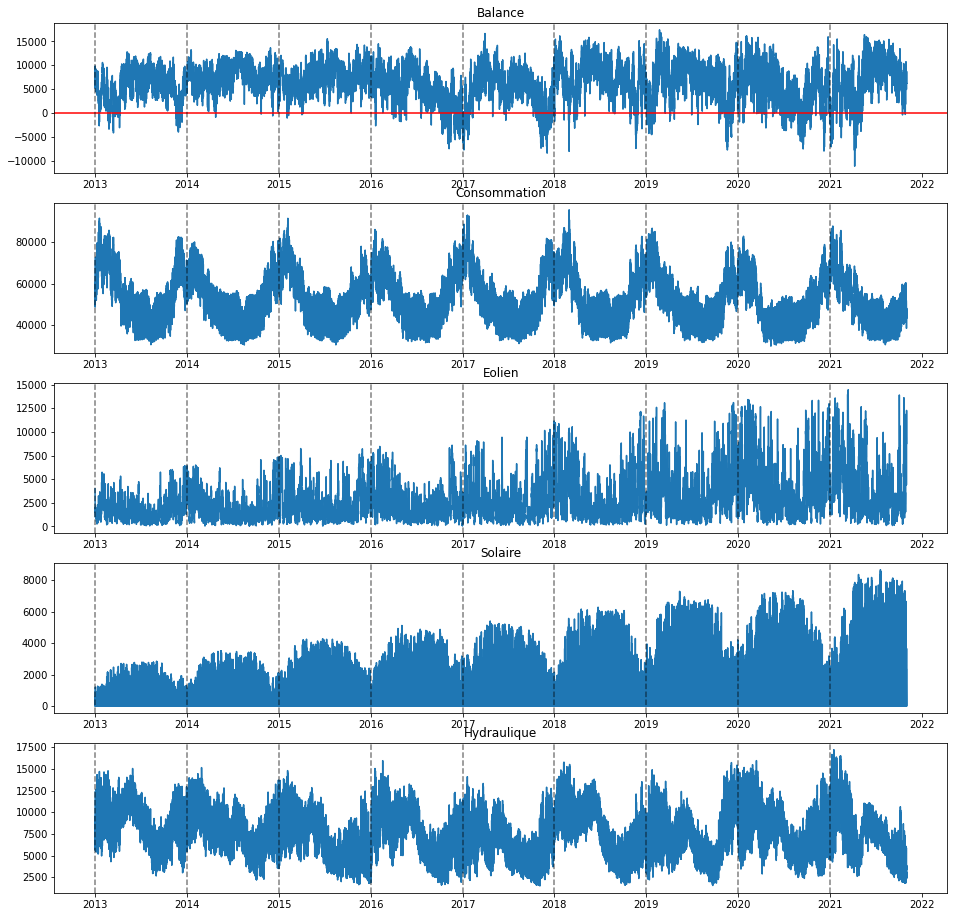

In [12]:
plt.figure(figsize=(16, 16))
plt.subplot(5, 1, 1)
plt.plot(france['Balance'])
plt.title('Balance')
plt.axhline(0, color = 'r');
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 2)
plt.plot(france['Consommation'])
plt.title('Consommation')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 3)
plt.plot(france['Eolien'])
plt.title('Eolien')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 4)
plt.plot(france['Solaire'])
plt.title('Solaire')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 5)
plt.plot(france['Hydraulique'])
plt.title('Hydraulique')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.savefig('./png/dataset_FR_3h.png');

In [13]:
france.to_csv('./dataset/France_3H.csv')

# targets périodes de 1 jour

In [14]:
france = france.resample('D').mean()

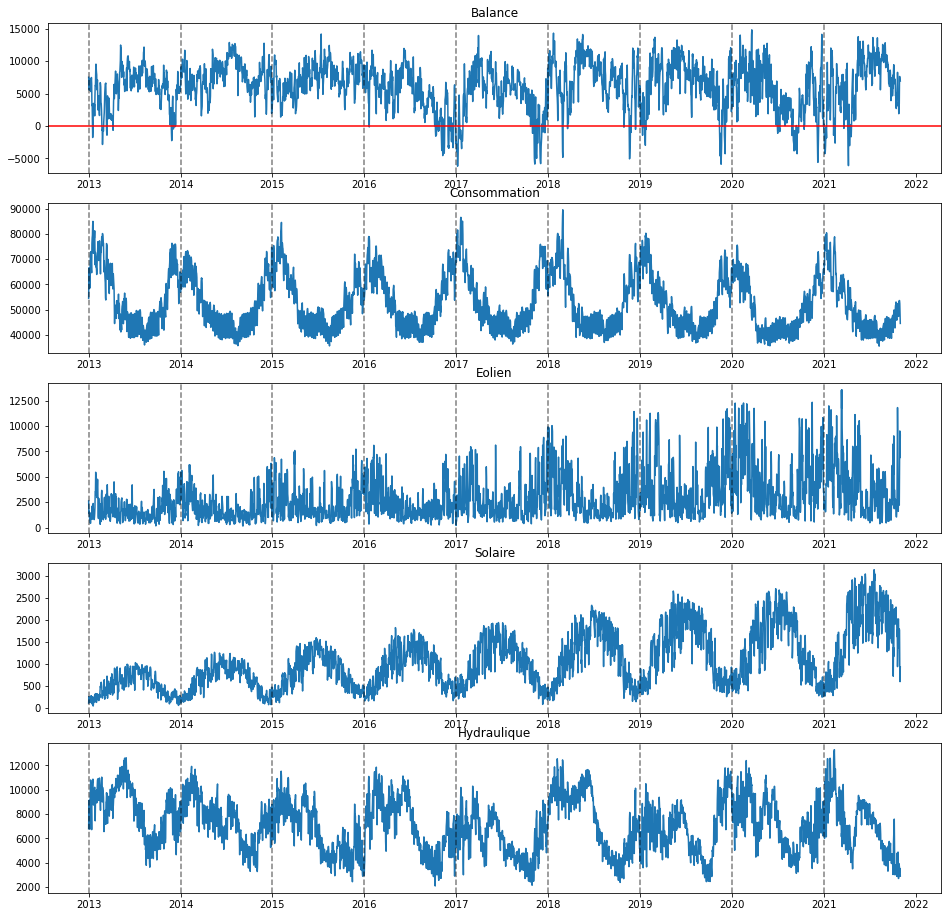

In [15]:
plt.figure(figsize=(16, 16))
plt.subplot(5, 1, 1)
plt.plot(france['Balance'])
plt.title('Balance')
plt.axhline(0, color = 'r');
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 2)
plt.plot(france['Consommation'])
plt.title('Consommation')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 3)
plt.plot(france['Eolien'])
plt.title('Eolien')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 4)
plt.plot(france['Solaire'])
plt.title('Solaire')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 5)
plt.plot(france['Hydraulique'])
plt.title('Hydraulique')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.savefig('./png/dataset_FR_D.png');

In [16]:
france.to_csv('./dataset/France_D.csv')

# targets périodes de 1 semaine

In [17]:
france = france.resample('W').mean()

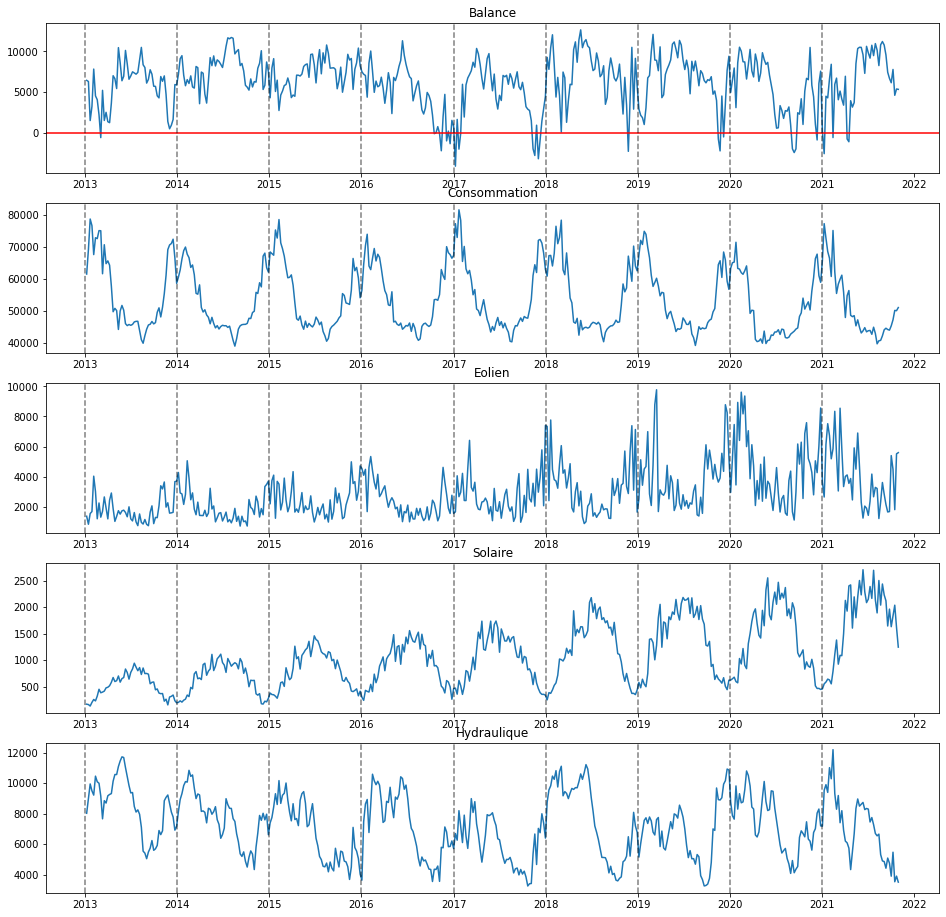

In [18]:
plt.figure(figsize=(16, 16))
plt.subplot(5, 1, 1)
plt.plot(france['Balance'])
plt.title('Balance')
plt.axhline(0, color = 'r');
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 2)
plt.plot(france['Consommation'])
plt.title('Consommation')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 3)
plt.plot(france['Eolien'])
plt.title('Eolien')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 4)
plt.plot(france['Solaire'])
plt.title('Solaire')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.subplot(5, 1, 5)
plt.plot(france['Hydraulique'])
plt.title('Hydraulique')
for year in range(2013, 2022): 
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.5)
plt.savefig('./png/dataset_FR_W.png');

In [19]:
france.to_csv('./dataset/France_W.csv')